# Explore here

There is no relation between the duration and popularity of the song. The most popular song has about the same duration of the least popular song.


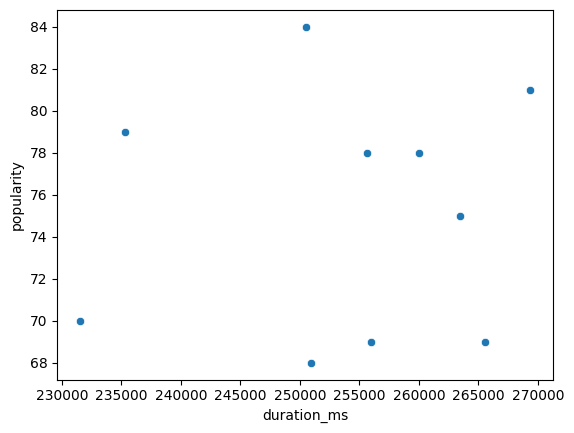

In [52]:
import os
import pandas as pd
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

foo_fighters_uri = 'spotify:artist:7jy3rLJdDQY21OgRLCZ9sD'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id, client_secret))

results = spotify.artist_top_tracks(foo_fighters_uri)
tracks = results['tracks']
tracks = [{k: v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

tracks_df = pd.DataFrame(tracks)
tracks_df.sort_values(by=['popularity']).head(3)

sns.scatterplot(data=tracks_df, x="duration_ms", y="popularity")
print(f"There is no relation between the duration and popularity of the song. The most popular song has about the same duration of the least popular song.")

